# Import Dependencies and data 
#### Read the data using pandas 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
data1 = "../Data/nhl odds 2014-15.csv"
data2 = "../Data/nhl odds 2015-16.csv"
data3 = "../Data/nhl odds 2016-17.csv"
data4 = "../Data/nhl odds 2017-18.csv"
data5 = "../Data/nhl odds 2018-19.csv"

# Read the mouse data and the study results
data1 = pd.read_csv(data1)
data2 = pd.read_csv(data2)
data3 = pd.read_csv(data3)
data4 = pd.read_csv(data4)
data5 = pd.read_csv(data5)


# Merge all the different seasons 

In [24]:
#put the frames of the different seasons into a list
frames = [data1, data2, data3, data4, data5]

#stack the frames into a single set for analysis
df = pd.concat(frames)
df2 = pd.concat(frames)
away_df = df[df['VH']=='V'].reset_index()
home_df = df[df['VH']=='H'].reset_index()


# Create Point Differntial Column 

#### Use the Point Differntial Column later on for ease when needed for finding the winner 


In [25]:
# Create point differential column 
p_dif = []

# Iterate through table and calculate point dif and insert into list 
for i in range(1, df.shape[0], 2):
        home_dif = df['Final'].iloc[i] - df['Final'].iloc[i-1]
        away_dif = df['Final'].iloc[i-1] - df['Final'].iloc[i]
        p_dif.append(away_dif)
        p_dif.append(home_dif)

# Add point dif column and data         
df['Point Dif'] = p_dif
df.reset_index()



,index,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point Dif
0,0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110,1
1,1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1
2,2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115,-1
3,3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1
4,4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,2711,606,10,H,Boston,0,0,1,1,-155,-160,-1.5,176.0,5.5,-110,5.5,-135,-1
13336,2712,609,11,V,Boston,1,0,4,5,100,105,1.5,-280.0,5.0,-110,5.0,-150,4
13337,2713,609,12,H,St.Louis,0,0,1,1,-120,-115,-1.5,230.0,5.0,-110,5.0,130,-4
13338,2714,612,13,V,St.Louis,2,0,2,4,151,155,1.5,-183.0,5.5,-110,5.0,-120,3


#  Create Favored team table 

#### Create favored team and add the result column to the favored team table 

In [5]:
# Create favored team table
fav = []

# Iterate through the table and see which team had the lower number in closing (Favored to win)
for i in range(1,df.shape[0], 2):
    if (df['Close'].iloc[i] < df['Close'].iloc[i-1]):
        fav.append(df.iloc[i])
    else:
        fav.append(df.iloc[i-1])

# Create new table with just the favored team in it
favored_df = pd.DataFrame(fav)
favored_df

# Create row to see who won or loss by checking the point diferential was positive or negative.
def set_winner(row):
    if row['Point Dif'] > 0:
        return 'Won'
    else:
        return 'Loss'

# add the result column 
favored_df = favored_df.assign(Result=favored_df.apply(set_winner, axis=1)) 
favored_df

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point Dif,Result
1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1,Loss
3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1,Won
5,1008,6,H,LosAngeles,0,0,0,0,-121,-150,-1.5,200.0,5.5,-147,5.0,116,-4,Loss
6,1008,7,V,Vancouver,1,2,1,4,-131,-126,-1.5,230.0,5.5,123,5.0,-140,2,Won
9,1009,52,H,Washington,1,0,0,1,-135,-145,-1.5,205.0,5.5,-115,5.5,-135,-1,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707,601,6,H,St.Louis,0,1,1,2,-130,-115,-1.5,236.0,5.0,-110,5.0,130,-5,Loss
2709,603,8,H,St.Louis,2,0,2,4,-110,-108,-1.5,234.0,5.5,-110,5.5,-150,2,Won
2711,606,10,H,Boston,0,0,1,1,-155,-160,-1.5,176.0,5.5,-110,5.5,-135,-1,Loss
2713,609,12,H,St.Louis,0,0,1,1,-120,-115,-1.5,230.0,5.0,-110,5.0,130,-4,Loss


# Create Bar Graph to show WL ratio of the favored team 

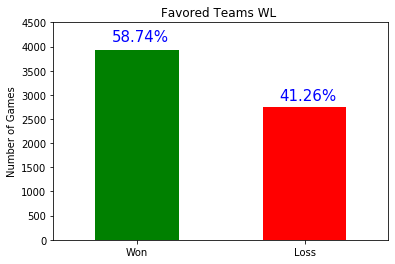

In [6]:
# Use this to check and make sure the counts are right 
# favored_df['Result'].value_counts()

# Created Bar graph with the win and loss results of the favored team in the match up
ax = favored_df['Result'].value_counts().plot(kind='bar', rot=0, color=['Green', 'Red'])
total = len(favored_df['Result'])
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height() * 1.05, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='Blue')
plt.ylabel('Number of Games')
plt.title('Favored Teams WL ')
plt.ylim(0,4500)
plt.show()



In [7]:
win = (favored_df['Result'] == 'Won')
loss = (favored_df['Result'] == 'Loss')

Won     3918
Loss    2752
Name: Result, dtype: int64

In [8]:
# Observed data with 6670 games 
observed = pd.Series([3918, 2752], index=["1", "2"])

# Create a data frame
df = pd.DataFrame([observed]).T

# Add a column whose default values are the expected values
df[1] = 3335

# Rename the columns
df.columns = ["observed", "expected"]

# View the data frame
df

,observed,expected
1,3918,3335
2,2752,3335


In [10]:
# Calculate the critical value
critical_value = st.chi2.ppf(q = 0.95, df = 1)
# Print the critical value
critical_value

3.841458820694124

In [12]:
# Run the chi square test with stats.chisquare()
st.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=203.83148425787107, pvalue=3.0461751371663487e-46)

# Create table for the Home and Away favored team WL 

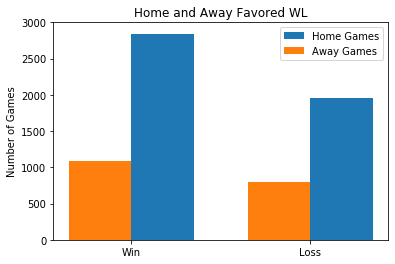

In [8]:
# Create table for the Home and Away favored team 
home_fav = favored_df[favored_df['VH'] == 'H']
away_fav = favored_df[favored_df['VH'] == 'V']

# Create two bar charts seperated by width to have them side by side. 
index = np.arange(2)
width = 0.35
plt.bar(index + width,home_fav['Result'].value_counts(), width = 0.35, label='Home Games')
plt.bar(index, away_fav['Result'].value_counts(),width = 0.35, label='Away Games')
plt.ylabel('Number of Games')
plt.title('Home and Away Favored WL')
plt.xticks(index + width / 2 , ('Win','Loss'))
plt.legend(loc='best')
plt.ylim(0,3000)
plt.show()

# Take off the comment to see the values. 
# home_fav['Result'].value_counts()
# away_fav['Result'].value_counts()

# Closing Odds vs Point Differential 

#### Using linear regression to help predict the data we can represent 

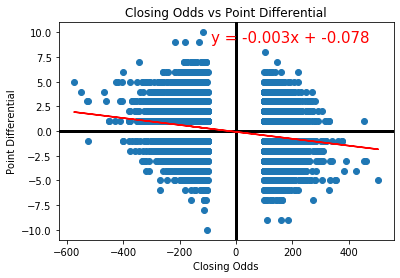

In [12]:
# X and Y axis
x_values = df['Close']
y_values = df['Point Dif']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

# Created scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-90, 9),fontsize=15,color="red")
plt.axhspan(-0.1, 0.1, -700, 700, color="black")
plt.axhspan(-12, 12, 0.528, 0.532, color="black")
plt.title('Closing Odds vs Point Differential')
plt.ylim(-11, 11)
plt.xlabel("Closing Odds")
plt.ylabel("Point Differential")
plt.show()

# Adding Money Line Payouts 

#### Add ML_Pays Column 

In [26]:
ml_pays_result = []

for i in range(0, df.shape[0]):
    if df['Close'].iloc[i] < 0:
        result = -100/df['Close'].iloc[i]
        ml_pays_result.append(result)
    else:
        result = df['Close'].iloc[i]/100
        ml_pays_result.append(result)
        
df['ML_Pays'] = ml_pays_result
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point Dif,ML_Pays
0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110,1,0.952381
1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1,0.869565
2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115,-1,1.650000
3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1,0.540541
4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136,4,1.300000


# Adding Puck Line Payouts 

#### Add PL_Pays Column

In [27]:
pl_pays_result = []

for i in range(0, df.shape[0]):
    if df['Unnamed: 11'].iloc[i] < 0:
        result = -100/df['Unnamed: 11'].iloc[i]
        pl_pays_result.append(result)
    else:
        result = df['Unnamed: 11'].iloc[i]/100
        pl_pays_result.append(result)
        
df['PL_Pays'] = pl_pays_result
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point Dif,ML_Pays,PL_Pays
0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110,1,0.952381,0.327869
1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1,0.869565,2.500000
2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115,-1,1.650000,0.555556
3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1,0.540541,1.550000
4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136,4,1.300000,0.416667


# Adding Money Line Outcome

#### Add ML_Outcome Column which shows the amount made (or lost) on a 100 dollar bet

In [28]:
ml_outcome = []

for i in range(0, df.shape[0]):
    if df['Point Dif'].iloc[i] > 0:
        result = 100*df['ML_Pays'].iloc[i]
        ml_outcome.append(result)
    else:
        result = -100
        ml_outcome.append(result)
        
df['ML_Outcome'] = ml_outcome
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point Dif,ML_Pays,PL_Pays,ML_Outcome
0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110,1,0.952381,0.327869,95.238095
1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1,0.869565,2.500000,-100.000000
2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115,-1,1.650000,0.555556,-100.000000
3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1,0.540541,1.550000,54.054054
4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136,4,1.300000,0.416667,130.000000


# Adding Puck Line Outcome 

#### Add Pl_Outcome Column which shows the amount made (or lost) on a 100 dollar bet

In [29]:
pl_outcome = []

for i in range(0, df.shape[0]):
    if df['Point Dif'].iloc[i] >= 2:
        result = 100*df['PL_Pays'].iloc[i]
        pl_outcome.append(result)
    elif (df['Point Dif'].iloc[i] <= 1) & (df['Puck Line'].iloc[i] == -1.5):
        result = -100
        pl_outcome.append(result)
    elif (df['Point Dif'].iloc[i] >= -1) & (df['Puck Line'].iloc[i] == 1.5):
        result = 100*df['PL_Pays'].iloc[i]
        pl_outcome.append(result)
    else:
        result = -100
        pl_outcome.append(result)
        
df['PL_Outcome'] = pl_outcome
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,...,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point Dif,ML_Pays,PL_Pays,ML_Outcome,PL_Outcome
0,1008,1,V,Montreal,1,1,2,4,-105,-105,...,-305.0,5.5,106,5.5,110,1,0.952381,0.327869,95.238095,32.786885
1,1008,2,H,Toronto,2,0,1,3,-115,-115,...,250.0,5.5,-126,5.5,-130,-1,0.869565,2.500000,-100.000000,-100.000000
2,1008,3,V,Philadelphia,0,0,1,1,165,165,...,-180.0,5.5,123,5.5,115,-1,1.650000,0.555556,-100.000000,55.555556
3,1008,4,H,Boston,1,0,1,2,-195,-185,...,155.0,5.5,-143,5.5,-135,1,0.540541,1.550000,54.054054,-100.000000
4,1008,5,V,SanJose,1,3,0,4,101,130,...,-240.0,5.5,127,5.0,-136,4,1.300000,0.416667,130.000000,41.666667


#  Create Betting Results Columns 

#### 

In [31]:
# Create row to see who won or loss by checking the point diferential was positive or negative.
def set_winner(row):
    if row['Point Dif'] > 0:
        return 'Won'
    else:
        return 'Loss'

def set_pl_winner(row):
    if row['PL_Outcome'] > 0:
        return 'Won'
    else:
        return 'Loss'
# add the result column 
df = df.assign(ML_Result=df.apply(set_winner, axis=1)) 
df = df.assign(PL_Result=df.apply(set_pl_winner, axis=1))
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,...,Unnamed: 13,Close OU,Unnamed: 15,Point Dif,ML_Pays,PL_Pays,ML_Outcome,PL_Outcome,ML_Result,PL_Result
0,1008,1,V,Montreal,1,1,2,4,-105,-105,...,106,5.5,110,1,0.952381,0.327869,95.238095,32.786885,Won,Won
1,1008,2,H,Toronto,2,0,1,3,-115,-115,...,-126,5.5,-130,-1,0.869565,2.500000,-100.000000,-100.000000,Loss,Loss
2,1008,3,V,Philadelphia,0,0,1,1,165,165,...,123,5.5,115,-1,1.650000,0.555556,-100.000000,55.555556,Loss,Won
3,1008,4,H,Boston,1,0,1,2,-195,-185,...,-143,5.5,-135,1,0.540541,1.550000,54.054054,-100.000000,Won,Loss
4,1008,5,V,SanJose,1,3,0,4,101,130,...,127,5.0,-136,4,1.300000,0.416667,130.000000,41.666667,Won,Won


#  Create Bins 

#### 

In [34]:
# Create the bins in which Data will be held
bins = [-600, -550.1, -500.1, -450.1, -400.1, -350.1, -300.1, -250.1, -200.1, -150.1, -109.1, 149.9, 199.9, 249.9, 299.9, 349.9,399.9, 449.9, 499.9, 600]

# Create the names for the four bins
group_names = ["-550+","-550 to -500", "-500 to -450", "-450 to -400", "-400 to -350", "-350 to -300", "-300 to -250", "-250 to -200", "-200 to -150", "-150 to PK", "PK to +150", "+150 to +200", "+200 to +250", "+250 to +300", "+300 to +350", "+350 to +400", "+400 to +450", "+450 to +500", "+500 and up"]

#Create column for the bins
df["Close Groups"] = pd.cut(df["Close"], bins, labels=group_names, include_lowest=True)

#  Create Expected Payout Table 

#### 

In [35]:
ml_won = (df['ML_Result'] == 'Won')
ml_loss = (df['ML_Result'] == 'Loss')

pl_won = (df['PL_Result'] == 'Won')
pl_loss = (df['PL_Result'] == 'Loss')

home = (df['VH'] == 'H')
away = (df['VH'] == 'V')

df_metrics = pd.DataFrame()

df_metrics['Wins'] = df[ml_won].groupby('Close Groups')['Team'].count()
df_metrics['Losses'] = df[ml_loss].groupby('Close Groups')['Team'].count()
df_metrics['PL Wins'] = df[pl_won].groupby('Close Groups')['Team'].count()
df_metrics['PL Losses'] = df[pl_loss].groupby('Close Groups')['Team'].count()
df_metrics['Total'] = df.groupby('Close Groups')['Team'].count()

df_metrics['Win %'] = 100 * df_metrics['Wins'] / df_metrics['Total']
df_metrics['Loss %'] = 100 * df_metrics['Losses'] / df_metrics['Total']
df_metrics['PL Win %'] = 100 * df_metrics['PL Wins'] / df_metrics['Total']
df_metrics['PL Loss %'] = 100 * df_metrics['PL Losses'] / df_metrics['Total']
df_metrics['Mean ML Payout Odds'] = df.groupby('Close Groups')['ML_Pays'].mean()
df_metrics['Mean PL Payout Odds'] = df.groupby('Close Groups')['PL_Pays'].mean()
df_metrics['Expected ML Payouts'] = (df_metrics['Win %'] * df_metrics['Mean ML Payout Odds'])+(-1*df_metrics['Loss %'])
df_metrics['Expected PL Payouts'] = (df_metrics['PL Win %'] * df_metrics['Mean PL Payout Odds'])+(-1*df_metrics['PL Loss %'])

df_metrics['Wins'] = df_metrics['Wins'].astype(int)
df_metrics['Losses'] = df_metrics['Losses'].astype(int)
df_metrics['PL Wins'] = df_metrics['PL Wins'].astype(int)
df_metrics['PL Losses'] = df_metrics['PL Losses'].astype(int)
df_metrics['Total'] = df_metrics['Total'].astype(int)

df_metrics['Win %'] = round(df_metrics['Win %'], 2)
df_metrics['Loss %'] = round(df_metrics['Loss %'], 2)
df_metrics['PL Win %'] = round(df_metrics['PL Win %'], 2)
df_metrics['PL Loss %'] = round(df_metrics['PL Loss %'], 2)
df_metrics['Mean ML Payout Odds'] = round(df_metrics['Mean ML Payout Odds'], 2)
df_metrics['Mean PL Payout Odds'] = round(df_metrics['Mean PL Payout Odds'], 2)
df_metrics['Expected ML Payouts'] = round(df_metrics['Expected ML Payouts'], 2)
df_metrics['Expected PL Payouts'] = round(df_metrics['Expected PL Payouts'], 2)

df_metrics

,Wins,Losses,PL Wins,PL Losses,Total,Win %,Loss %,PL Win %,PL Loss %,Mean ML Payout Odds,Mean PL Payout Odds,Expected ML Payouts,Expected PL Payouts
Close Groups,,,,,,,,,,,,,
-550+,1,0,1,0,1,100.00,0.00,100.00,0.00,0.17,0.59,17.39,58.82
-550 to -500,3,1,3,1,4,75.00,25.00,75.00,25.00,0.19,0.59,-10.91,19.19
-500 to -450,2,0,2,0,2,100.00,0.00,100.00,0.00,0.22,0.60,21.51,59.82
-450 to -400,9,0,5,4,9,100.00,0.00,55.56,44.44,0.24,0.69,23.68,-6.28
-400 to -350,16,7,12,11,23,69.57,30.43,52.17,47.83,0.27,0.76,-11.77,-7.94
-350 to -300,49,20,31,38,69,71.01,28.99,44.93,55.07,0.31,0.88,-7.18,-15.36
-300 to -250,132,58,92,98,190,69.47,30.53,48.42,51.58,0.37,1.05,-5.16,-0.70
-250 to -200,424,194,250,368,618,68.61,31.39,40.45,59.55,0.45,1.30,-0.38,-6.78
-200 to -150,1246,768,716,1298,2014,61.87,38.13,35.55,64.45,0.59,1.69,-1.85,-4.28


#  Create Expected Payout Table for Home Games

#### 

In [36]:
df_home_metrics = pd.DataFrame()

df_home_metrics['Home Wins'] = df[ml_won & home].groupby('Close Groups')['Team'].count()
df_home_metrics['Home Losses'] = df[ml_loss & home].groupby('Close Groups')['Team'].count()
df_home_metrics['Home PL Wins'] = df[pl_won & home].groupby('Close Groups')['Team'].count()
df_home_metrics['Home PL Losses'] = df[pl_loss & home].groupby('Close Groups')['Team'].count()
df_home_metrics['Home Total'] = df[home].groupby('Close Groups')['Team'].count()

df_home_metrics['Home Win %'] = 100 * df_home_metrics['Home Wins'] / df_home_metrics['Home Total']
df_home_metrics['Home Loss %'] = 100 * df_home_metrics['Home Losses'] / df_home_metrics['Home Total']
df_home_metrics['Home PL Win %'] = 100 * df_home_metrics['Home PL Wins'] / df_home_metrics['Home Total']
df_home_metrics['Home PL Loss %'] = 100 * df_home_metrics['Home PL Losses'] / df_home_metrics['Home Total']
df_home_metrics['Home Mean ML Payout Odds'] = df[home].groupby('Close Groups')['ML_Pays'].mean()
df_home_metrics['Home Mean PL Payout Odds'] = df[home].groupby('Close Groups')['PL_Pays'].mean()
df_home_metrics['Home Expected ML Payouts'] = (df_home_metrics['Home Win %'] * df_home_metrics['Home Mean ML Payout Odds'])+(-1*df_home_metrics['Home Loss %'])
df_home_metrics['Home Expected PL Payouts'] = (df_home_metrics['Home PL Win %'] * df_home_metrics['Home Mean PL Payout Odds'])+(-1*df_home_metrics['Home PL Loss %'])

df_home_metrics['Home Wins'] = df_home_metrics['Home Wins'].astype(int)
df_home_metrics['Home Losses'] = df_home_metrics['Home Losses'].astype(int)
df_home_metrics['Home PL Wins'] = df_home_metrics['Home PL Wins'].astype(int)
df_home_metrics['Home PL Losses'] = df_home_metrics['Home PL Losses'].astype(int)
df_home_metrics['Home Total'] = df_home_metrics['Home Total'].astype(int)

df_home_metrics['Home Win %'] = round(df_home_metrics['Home Win %'], 2)
df_home_metrics['Home Loss %'] = round(df_home_metrics['Home Loss %'], 2)
df_home_metrics['Home PL Win %'] = round(df_home_metrics['Home PL Win %'], 2)
df_home_metrics['Home PL Loss %'] = round(df_home_metrics['Home PL Loss %'], 2)
df_home_metrics['Home Mean ML Payout Odds'] = round(df_home_metrics['Home Mean ML Payout Odds'], 2)
df_home_metrics['Home Mean PL Payout Odds'] = round(df_home_metrics['Home Mean PL Payout Odds'], 2)
df_home_metrics['Home Expected ML Payouts'] = round(df_home_metrics['Home Expected ML Payouts'], 2)
df_home_metrics['Home Expected PL Payouts'] = round(df_home_metrics['Home Expected PL Payouts'], 2)

df_home_metrics

,Home Wins,Home Losses,Home PL Wins,Home PL Losses,Home Total,Home Win %,Home Loss %,Home PL Win %,Home PL Loss %,Home Mean ML Payout Odds,Home Mean PL Payout Odds,Home Expected ML Payouts,Home Expected PL Payouts
Close Groups,,,,,,,,,,,,,
-550+,1,0,1,0,1,100.00,0.00,100.00,0.00,0.17,0.59,17.39,58.82
-550 to -500,3,1,3,1,4,75.00,25.00,75.00,25.00,0.19,0.59,-10.91,19.19
-500 to -450,2,0,2,0,2,100.00,0.00,100.00,0.00,0.22,0.60,21.51,59.82
-450 to -400,9,0,5,4,9,100.00,0.00,55.56,44.44,0.24,0.69,23.68,-6.28
-400 to -350,14,7,11,10,21,66.67,33.33,52.38,47.62,0.27,0.77,-15.42,-7.48
-350 to -300,44,18,28,34,62,70.97,29.03,45.16,54.84,0.31,0.88,-7.27,-15.32
-300 to -250,128,52,89,91,180,71.11,28.89,49.44,50.56,0.37,1.05,-2.92,1.44
-250 to -200,386,171,229,328,557,69.30,30.70,41.11,58.89,0.45,1.31,0.63,-5.06
-200 to -150,971,628,567,1032,1599,60.73,39.27,35.46,64.54,0.58,1.69,-3.83,-4.76


#  Create Expected Payout Table for Away Games

#### 

In [37]:
df_away_metrics = pd.DataFrame()

df_away_metrics['Away Wins'] = df[ml_won & away].groupby('Close Groups')['Team'].count()
df_away_metrics['Away Losses'] = df[ml_loss & away].groupby('Close Groups')['Team'].count()
df_away_metrics['Away PL Wins'] = df[pl_won & away].groupby('Close Groups')['Team'].count()
df_away_metrics['Away PL Losses'] = df[pl_loss & away].groupby('Close Groups')['Team'].count()
df_away_metrics['Away Total'] = df[away].groupby('Close Groups')['Team'].count()

df_away_metrics['Away Win %'] = 100 * df_away_metrics['Away Wins'] / df_away_metrics['Away Total']
df_away_metrics['Away Loss %'] = 100 * df_away_metrics['Away Losses'] / df_away_metrics['Away Total']
df_away_metrics['Away PL Win %'] = 100 * df_away_metrics['Away PL Wins'] / df_away_metrics['Away Total']
df_away_metrics['Away PL Loss %'] = 100 * df_away_metrics['Away PL Losses'] / df_away_metrics['Away Total']
df_away_metrics['Away Mean ML Payout Odds'] = df[away].groupby('Close Groups')['ML_Pays'].mean()
df_away_metrics['Away Mean PL Payout Odds'] = df[away].groupby('Close Groups')['PL_Pays'].mean()
df_away_metrics['Away Expected ML Payouts'] = (df_away_metrics['Away Win %'] * df_away_metrics['Away Mean ML Payout Odds'])+(-1*df_away_metrics['Away Loss %'])
df_away_metrics['Away Expected PL Payouts'] = (df_away_metrics['Away PL Win %'] * df_away_metrics['Away Mean PL Payout Odds'])+(-1*df_away_metrics['Away PL Loss %'])

df_away_metrics['Away Wins'] = df_away_metrics['Away Wins'].astype(int)
df_away_metrics['Away Losses'] = df_away_metrics['Away Losses'].astype(int)
df_away_metrics['Away PL Wins'] = df_away_metrics['Away PL Wins'].astype(int)
df_away_metrics['Away PL Losses'] = df_away_metrics['Away PL Losses'].astype(int)
df_away_metrics['Away Total'] = df_away_metrics['Away Total'].astype(int)

df_away_metrics['Away Win %'] = round(df_away_metrics['Away Win %'], 2)
df_away_metrics['Away Loss %'] = round(df_away_metrics['Away Loss %'], 2)
df_away_metrics['Away PL Win %'] = round(df_away_metrics['Away PL Win %'], 2)
df_away_metrics['Away PL Loss %'] = round(df_away_metrics['Away PL Loss %'], 2)
df_away_metrics['Away Mean ML Payout Odds'] = round(df_away_metrics['Away Mean ML Payout Odds'], 2)
df_away_metrics['Away Mean PL Payout Odds'] = round(df_away_metrics['Away Mean PL Payout Odds'], 2)
df_away_metrics['Away Expected ML Payouts'] = round(df_away_metrics['Away Expected ML Payouts'], 2)
df_away_metrics['Away Expected PL Payouts'] = round(df_away_metrics['Away Expected PL Payouts'], 2)

df_away_metrics

,Away Wins,Away Losses,Away PL Wins,Away PL Losses,Away Total,Away Win %,Away Loss %,Away PL Win %,Away PL Loss %,Away Mean ML Payout Odds,Away Mean PL Payout Odds,Away Expected ML Payouts,Away Expected PL Payouts
Close Groups,,,,,,,,,,,,,
-550+,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-550 to -500,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-500 to -450,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-450 to -400,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-400 to -350,2,0,1,1,2,100.00,0.00,50.00,50.00,0.26,0.74,26.32,-12.76
-350 to -300,5,2,3,4,7,71.43,28.57,42.86,57.14,0.31,0.96,-6.38,-15.93
-300 to -250,4,6,3,7,10,40.00,60.00,30.00,70.00,0.36,1.04,-45.47,-38.86
-250 to -200,38,23,21,40,61,62.30,37.70,34.43,65.57,0.45,1.26,-9.56,-22.16
-200 to -150,275,140,149,266,415,66.27,33.73,35.90,64.10,0.60,1.72,5.83,-2.41
